In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json 
import ast


In [3]:
dataframe = pd.read_csv('Data/movie.metadata.tsv', sep='\t', names = ['Wikipedia MovieID', 'Freebase MovieID', 'Movie name', 'Movie release date', 'Movie Boxoffice Revenue','Movie runtime', 'Movie Languages', 'Movie COuntries', 'Movie genres' ])

# Afficher le tableau
display(dataframe)

,Wikipedia MovieID,Freebase MovieID,Movie name,Movie release date,Movie Boxoffice Revenue,Movie runtime,Movie Languages,Movie COuntries,Movie genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}"
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0..."
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}"
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ..."


In [17]:
#Drop every movie with a NaN as a release date and create a new column Movie release year
df_with_years = dataframe.copy(deep = True)
df_with_years = df_with_years.dropna(subset=['Movie release date'])
df_with_years['Movie release Year'] = df_with_years['Movie release date'].str[0:4]
df_with_years['Movie release Year'] = pd.to_numeric(df_with_years['Movie release Year'], errors='raise') #Check si les strings sont autres que des nombres
df_with_years = df_with_years.sort_values('Movie release Year', ascending=True) #Trier les films par ordre croissant des années

df_with_years.drop(62836, inplace=True) #Erreur sur la première valeur avec une année de 1010


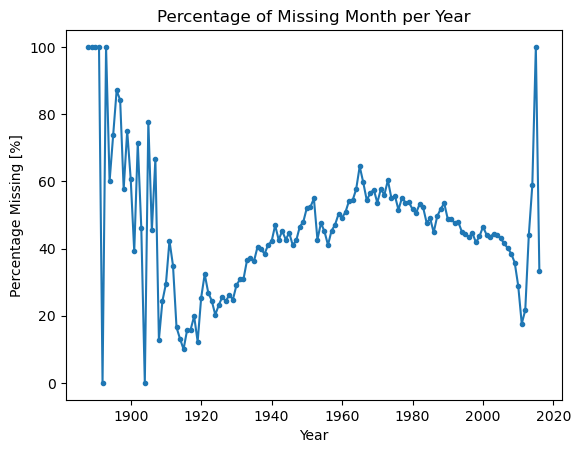

In [18]:
percentage = lambda x: (x.astype(str).apply(len) < 5).mean() * 100

missing_data_percentage = df_with_years.groupby('Movie release Year')['Movie release date'].apply(percentage)


# Use of the plot function to get a line plot
plt.plot(missing_data_percentage.index, missing_data_percentage.values, marker='.')
plt.title('Percentage of Missing Month per Year')
plt.xlabel('Year')
plt.ylabel('Percentage Missing [%]')
plt.show()

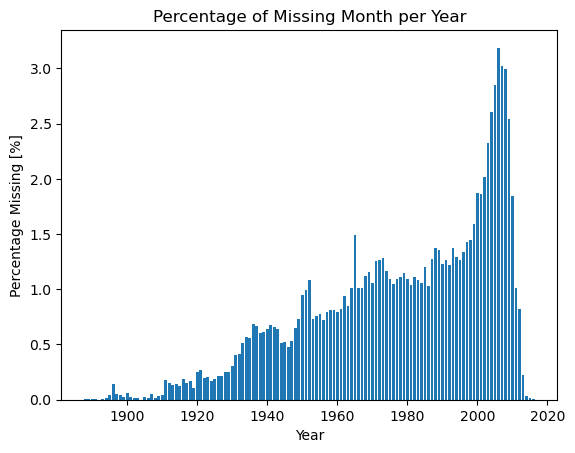

In [19]:
number_of_missing_movie = df_with_years.groupby('Movie release Year')['Movie release Year'].sum()*missing_data_percentage/100

cumulative_percentage = (number_of_missing_movie*100/number_of_missing_movie.sum())

plt.bar(cumulative_percentage.index, cumulative_percentage.values)
plt.title('Percentage of Missing Month per Year')
plt.xlabel('Year')
plt.ylabel('Percentage Missing [%]')
plt.show()


In [20]:
# Convert to numerci the release years and be sure that movies release year are numeric
df_with_years['Movie release Year'] = pd.to_numeric(df_with_years['Movie release Year'], errors='raise')

In [22]:
df_with_months = df_with_years.copy(deep=True)
# Remove the row which don't have the month of release:
df_with_months = df_with_months[df_with_months['Movie release date'].str.len() > 4]
df_with_months = df_with_months.reset_index(drop = True)
display(df_with_months)


# Dataframe only with rows where release month is available : df_with_months

ratio = len(df_with_months)*100/len(dataframe)

print(f"The number of movie with the release month is : {len(df_with_months)}\nThe ratio of films with the release month is : {ratio:.2f}%")

,Wikipedia MovieID,Freebase MovieID,Movie name,Movie release date,Movie Boxoffice Revenue,Movie runtime,Movie Languages,Movie COuntries,Movie genres,Movie release Year
0,9996498,/m/02pz844,Le Clown et ses chiens,1892-10-28,NaN,NaN,"{""/m/06ppq"": ""Silent film""}","{""/m/0f8l9c"": ""France""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1892
1,9999926,/m/02pzdsc,Un bon bock,1892-10-28,NaN,NaN,"{""/m/06ppq"": ""Silent film""}","{""/m/0f8l9c"": ""France""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1892
2,6431647,/m/0g53g2,Pauvre Pierrot,1892-10-28,NaN,NaN,"{""/m/06ppq"": ""Silent film""}","{""/m/0f8l9c"": ""France""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1892
3,10109752,/m/02q23xk,Miss Jerry,1894-10-09,NaN,NaN,"{""/m/06ppq"": ""Silent film""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1894
4,10094757,/m/02q1md8,Chinese Opium Den,1894-10-01,NaN,1.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1894
...,...,...,...,...,...,...,...,...,...,...
42661,35042288,/m/0j630fh,Bulbul,2014-07,NaN,NaN,"{""/m/09bnf"": ""Kannada Language""}","{""/m/03rk0"": ""India""}",{},2014
42662,36534974,/m/0kdy118,Noah,2014-03-28,NaN,NaN,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama"", ""/m/01hmnh"": ""Fantasy""}",2014
42663,35764246,/m/0jt01_6,Appayya,2014-08-15,NaN,NaN,"{""/m/09bnf"": ""Kannada Language""}","{""/m/03rk0"": ""India""}","{""/m/02l7c8"": ""Romance Film""}",2014
42664,27554912,/m/0c03gcc,Kung Fu Panda 3,2016-03-18,NaN,NaN,{},{},{},2016


The number of movie with the release month is : 42666
The ratio of films with the release month is : 52.20%


In [23]:
# create a column with release month column

df_with_months['Movie release Month'] = df_with_months['Movie release date'].str[5:7]

#Convert string to int for month
df_with_months['Movie release Month'] = pd.to_numeric(df_with_months['Movie release Month'], errors='raise') #Check si les strings sont autres que des nombres

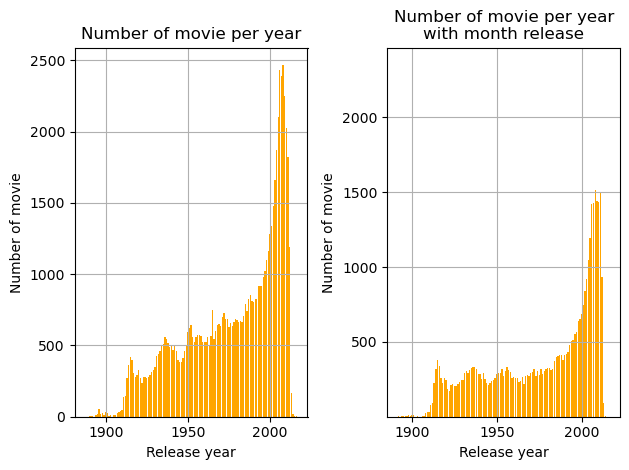

In [24]:
# Counting number of movie per year
film_counts_year = df_with_years['Movie release Year'].value_counts().sort_index()

# Counting number of movie with month release per year
film_counts_year_without_missing_months = df_with_months['Movie release Year'].value_counts().sort_index()

# Plot the number of movies per year
plt.subplot(1, 2, 1)

plt.bar(film_counts_year.index, film_counts_year.values, color='orange')
plt.title('Number of movie per year')
plt.xlabel('Release year')
plt.ylabel('Number of movie')
plt.grid()

# Plot the number of movies per year
plt.subplot(1, 2, 2)

plt.bar(film_counts_year_without_missing_months.index, film_counts_year_without_missing_months.values, color='orange')
plt.title('Number of movie per year\nwith month release')
plt.xlabel('Release year')
plt.ylabel('Number of movie')
plt.grid()


# Set the same Y-axis limits for both subplots
plt.ylim(min(min(film_counts_year.values), min(film_counts_year_without_missing_months.values)),
         max(max(film_counts_year.values), max(film_counts_year_without_missing_months.values)))

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [27]:
# Takes out all the years where the number of movies is under 200
df_main_years = df_with_months.copy(deep=True)

years_under_200 = film_counts_year_without_missing_months.index[film_counts_year_without_missing_months.values > 200]
df_main_years = df_main_years[df_main_years['Movie release Year'].isin(years_under_200)]

print(f"The length of the new dataframe is : {len(df_main_years)}\nOur study will be based on {len(df_main_years)*100/len(dataframe):.2f} % of the complete dataset")

The length of the new dataframe is : 41855
Our study will be based on 51.20 % of the complete dataset


TEST 1: to get the list of all the genres, but the loop takes takes a long time!!

My pb: 
I have a column of my dataframe whose cell are of type json. I would like to merge all these lines in order to get a big json file, but don't know how to do that.


# Create an empty dataframe
empty_frame = {'genre ID': [], 'genre name': []}
genres = pd.DataFrame(data=empty_frame)


#Iterate over all rows: takes so much time!!!
for index, row in df.iterrows():
    #print(index)
    # Convert the JSON strings to Python dictionaries
    df2 = df.iloc[index]['Movie genres']
    df3 = json.loads(df2)
    df4 = pd.json_normalize(df3)

    # Transpose the DataFrame to move the first row of column names to become a regular row
    df5 = df4.T.reset_index()
    df5 = df5.rename(columns={'index': 'genre ID', 0: 'genre name'})

    #frames = [d, df5]
    # concatenate infos in rowq
    genres = pd.concat([genres, df5])

# delete all repeated values
genres = genres.drop_duplicates()
genres


TEST 2: select only the first 2 genres, and add them to the main frame.


We start from the hypothesis that the genres are in importance order, so we'll keep only the first 2 genres per movie. 

PB: I think the order of genre is a bit random, so they can be very different from one to another, and so we could loose data by keeping 'Latino' instead of 'comic' for example.

# enlever un warning
pd.options.mode.chained_assignment = None  # default='warn'

# Create empty column for 2 main genres
df['genre 1']= None
df['genre 2'] = None

# Iterate over rows of df
for index, row in df.iterrows():

    df2 = df.iloc[index]['Movie genres']
    df3 = json.loads(df2)
    df4 = pd.json_normalize(df3)

    if df4.shape[1]>0:
        df['genre 1'].iloc[index] = df4.iloc[0, 0]

        if df4.shape[1]>1:
            df['genre 2'].iloc[index] = df4.iloc[0, 1]

df.head()

# Transpose the DataFrame to move the first row of column names to become a regular row
#df5 = df4.T.reset_index()
#df5 = df5.rename(columns={'index': 'genre ID', 0: 'genre name'})


Idea: What would be interesting is to determine the most common genres, and to associate at each movie their two most famous genres, so we can make a more general analysis.

TEST 3: little test on the first movie

# enlever un warning
pd.options.mode.chained_assignment = None  # default='warn'

# Create an empty dataframe
empty_frame = pd.DataFrame(index=range(364),columns=range(2))
nb_genres = empty_frame.rename(columns={0: 'genre name', 1: 'nb of movies'})
nb_genres['nb of movies'].fillna(0,inplace=True)
i = 0

df2 = df.iloc[0]['Movie genres']
df3 = json.loads(df2)
df4 = pd.json_normalize(df3)


nb_genres['genre name'].iloc[0] = df4.iloc[0,0]
nb_genres['nb of movies'].iloc[0] = 1

for column in df4:
    print(not (nb_genres['genre name'].isin([df4[column].iloc[0]]).any()))
    if not (nb_genres['genre name'].isin([df4[column].iloc[0]]).any()):
        nb_genres['genre name'].iloc[i] = df4[column].iloc[0]
        nb_genres['nb of movies'][i] = 1
        i = i+1
    else:
        idx = nb_genres.loc[nb_genres['genre name'].isin([df4[column].iloc[0]])].index
        nb_genres['nb of movies'][idx] = nb_genres['nb of movies'][idx] + 1


nb_genres



## TEST 4: all the genres and their occurrence. Takes 2min to compute!!!

In [ ]:
# enlever un warning
pd.options.mode.chained_assignment = None  # default='warn'

# Create an empty dataframe
empty_frame = pd.DataFrame(index=range(363),columns=range(2))
nb_genres = empty_frame.rename(columns={0: 'genre name', 1: 'nb of movies'})
nb_genres['nb of movies'].fillna(0,inplace=True)
i = 0

df5 = None
# Iterate over rows of df
for index, row in df.iterrows():
    df2 = df.iloc[index]['Movie genres']
    df3 = json.loads(df2)
    df4 = pd.json_normalize(df3)
    
    for column in df4:
        if not (nb_genres['genre name'].isin([df4[column].iloc[0]]).any()):
            nb_genres['genre name'].iloc[i] = df4[column].iloc[0]
            nb_genres['nb of movies'][i] = 1
            i = i+1
        else:
            idx = nb_genres.loc[nb_genres['genre name'].isin([df4[column].iloc[0]])].index
            nb_genres['nb of movies'][idx] = nb_genres['nb of movies'][idx] + 1



In [ ]:
nb_genres

,genre name,nb of movies
0,Short Film,4488
1,Silent film,3901
2,Indie,4349
3,Animation,2059
4,Black-and-white,5880
...,...,...
358,NaN,0
359,NaN,0
360,NaN,0
361,NaN,0


In [ ]:
nb_genres = nb_genres.sort_values("nb of movies",ascending=False)
nb_genres = nb_genres.reset_index(drop = True) #don't compute this over and over!!!!
nb_genres=nb_genres.dropna()

In [ ]:
nb_genres.head(50)

,genre name,nb of movies
0,Drama,19036
1,Comedy,9990
2,Romance Film,6182
3,Black-and-white,5880
4,Thriller,5305
5,Action,5077
6,Short Film,4488
7,Indie,4349
8,Crime Fiction,4249
9,Silent film,3901


Relevant genres we need to gather:
- Drama
- Comedy/ Comedy film
- Romance film/ romantic drama, romantic comedy
- Action/ adventure 
- Thriller: crime fiction, crime thriller
- Horror 
- Family  animation 

Here we get the 50 most common genres. 
Ce qu'il reste à faire:
- identifier les groupes de genres, afin de pouvoir utiliser plus de data;
- associer dans le grand tableau les 2 principaux genres: trouver un moyen d'y acceder sans reparcourir toutes les lignes!! Impossible car jpp savoir quels genres sont les plus fréquents.


We can see that if we only select the 50 first genres, it is enough because below, they don't gather a lot of movies, so not that relevant. 

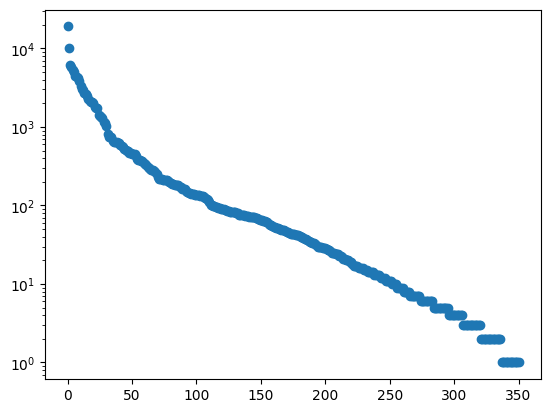

In [ ]:
plt.scatter(nb_genres.index,nb_genres['nb of movies'])
plt.yscale("log")

We can decide a minimum number of movies per genre for  a genre to be considered further in the analysis.
We decide to put the minimum threshold at 2500 movies. CAN BE CHANGED

We then consider the genres below:
- Drama
- Comedy
- Romance
- Black and white
- Thriller
- Action
- Short film
- Indie
- Silent film
- World film
- Adventure 
- Family
- Horror

I think the genres: Black-and-white, Silent film, Short film, Indie, World film are not relevant at first sight, but because they represent a high proportion of movies I still put them, in case we need them.

In [ ]:
drama_genres = nb_genres[nb_genres['genre name'].str.contains('Drama')]
drama_genres['main name'] = 'Drama'
drama_genres

,genre name,nb of movies,main name
0,Drama,19036,Drama
37,Family Drama,641,Drama
60,Crime Drama,341,Drama
92,Courtroom Drama,155,Drama
106,Musical Drama,129,Drama
109,Marriage Drama,117,Drama
120,Erotic Drama,90,Drama
129,Childhood Drama,82,Drama
179,Addiction Drama,42,Drama
217,Inspirational Drama,20,Drama


In [ ]:
comedy_genres = nb_genres[nb_genres['genre name'].str.contains('Comedy|Slapstick|Parody')]
comedy_genres['main name'] = 'Comedy'
comedy_genres

,genre name,nb of movies,main name
1,Comedy,9990,Comedy
15,Comedy film,2459,Comedy
29,Comedy-drama,1121,Comedy
42,Parody,578,Comedy
48,Slapstick,469,Comedy
80,Comedy of manners,192,Comedy
87,Crime Comedy,173,Comedy
90,Fantasy Comedy,163,Comedy
91,Domestic Comedy,160,Comedy
102,Comedy of Errors,135,Comedy


In [ ]:
romance_genres = nb_genres[nb_genres['genre name'].str.contains('Romance|Romantic')]
romance_genres['main name'] = 'Romance'
romance_genres

,genre name,nb of movies,main name
2,Romance Film,6182,Romance
20,Romantic drama,1998,Romance
23,Romantic comedy,1765,Romance
161,Romantic fantasy,53,Romance
338,Romantic thriller,1,Romance


In [ ]:
# Not sure what we will interpret: maybe compare the tendency with respect to month of old movies compared to more recent movies. But represent a high proportion of movies.
old_genres = nb_genres[nb_genres['genre name'].str.contains('Black-and-white|Silent film')]
old_genres['main name'] = 'Old film'
old_genres

,genre name,nb of movies,main name
3,Black-and-white,5880,Old film
9,Silent film,3901,Old film


In [ ]:
thriller_genres = nb_genres[nb_genres['genre name'].str.contains('Thriller|Crime')]
thriller_genres['main name'] = 'Thriller'
thriller_genres

,genre name,nb of movies,main name
4,Thriller,5305,Thriller
8,Crime Fiction,4249,Thriller
26,Crime Thriller,1321,Thriller
60,Crime Drama,341,Thriller
62,Action Thrillers,307,Thriller
87,Crime Comedy,173,Thriller
156,Comedy Thriller,58,Thriller
178,Law & Crime,42,Thriller
188,Crime,34,Thriller
306,Sci-Fi Thriller,4,Thriller


In [ ]:
action_genres = nb_genres[nb_genres['genre name'].str.contains('Action|Adventure|War|Western')]
action_genres['main name'] = 'Action'
action_genres

,genre name,nb of movies,main name
5,Action,5077,Action
11,Adventure,3083,Action
14,Action/Adventure,2627,Action
24,War film,1412,Action
25,Western,1377,Action
62,Action Thrillers,307,Action
82,Family-Oriented Adventure,186,Action
93,Fantasy Adventure,149,Action
112,Adventure Comedy,101,Action
113,Action Comedy,99,Action


In [ ]:
short_film_genre = nb_genres[nb_genres['genre name'].str.contains('Short Film')]
short_film_genre['main name'] = 'Short Film'
short_film_genre

,genre name,nb of movies,main name
6,Short Film,4488,Short Film


In [ ]:
indie_genre = nb_genres[nb_genres['genre name'].str.contains('Indie')]
indie_genre['main name'] = 'Indie'
indie_genre

,genre name,nb of movies,main name
7,Indie,4349,Indie


In [ ]:
world_genre = nb_genres[nb_genres['genre name'].str.contains('World|Chinese|Japanese|Bollywood')]
world_genre['main name'] = 'World Film'
world_genre

,genre name,nb of movies,main name
10,World cinema,3303,World Film
27,Japanese Movies,1290,World Film
35,Bollywood,657,World Film
45,Chinese Movies,507,World Film
273,World History,7,World Film


In [ ]:
family_genres = nb_genres[nb_genres['genre name'].str.contains('Family|Animation|Child')]
family_genres['main name'] = 'Family Film'
family_genres

,genre name,nb of movies,main name
12,Family Film,2945,Family Film
19,Animation,2059,Family Film
37,Family Drama,641,Family Film
38,Children's/Family,636,Family Film
57,Children's,373,Family Film
81,Children's Fantasy,189,Family Film
82,Family-Oriented Adventure,186,Family Film
89,Computer Animation,164,Family Film
129,Childhood Drama,82,Family Film
269,Children's Entertainment,7,Family Film


In [ ]:
# Drop movies which are not for Children
family_genres = family_genres.drop(family_genres.index[[2, 8, 10,11]])
family_genres

,genre name,nb of movies,main name
12,Family Film,2945,Family Film
19,Animation,2059,Family Film
38,Children's/Family,636,Family Film
57,Children's,373,Family Film
81,Children's Fantasy,189,Family Film
82,Family-Oriented Adventure,186,Family Film
89,Computer Animation,164,Family Film
269,Children's Entertainment,7,Family Film


In [ ]:
horror_genres = nb_genres[nb_genres['genre name'].str.contains('Horror')]
horror_genres['main name'] = 'Horror'
horror_genres

,genre name,nb of movies,main name
13,Horror,2703,Horror
103,Horror Comedy,133,Horror
122,Sci-Fi Horror,88,Horror
185,Costume Horror,37,Horror
226,Road-Horror,16,Horror
326,Period Horror,2,Horror


In [ ]:
informative_genres = nb_genres[nb_genres['genre name'].str.contains('Documentary|Biography|Biopic|History')]
informative_genres['main name'] = 'Informative'
informative_genres

,genre name,nb of movies,main name
17,Documentary,2166,Informative
32,Biography,750,Informative
49,History,464,Informative
54,Biopic [feature],390,Informative
201,Film & Television History,28,Informative
273,World History,7,Informative


Now that we have clusters of genres, we assign 2/3 main genre for each movies. The ones which do not have one main genre are not considered further in the analysis. 

In [ ]:
#Creating the main genre dataframe so we can modify the original frame
main_genres =  pd.concat([drama_genres, comedy_genres,romance_genres,thriller_genres,action_genres,family_genres,horror_genres,informative_genres])
main_genres = main_genres.reset_index(drop = True)
main_genres

,genre name,nb of movies,main name
0,Drama,19036,Drama
1,Family Drama,641,Drama
2,Crime Drama,341,Drama
3,Courtroom Drama,155,Drama
4,Musical Drama,129,Drama
...,...,...,...
82,Biography,750,Informative
83,History,464,Informative
84,Biopic [feature],390,Informative
85,Film & Television History,28,Informative


In [ ]:
# Iterate again over all row and 
df.head()

,Wikipedia MovieID,Freebase MovieID,Movie name,Movie release date,Movie Boxoffice Revenue,Movie runtime,Movie Languages,Movie COuntries,Movie genres,Movie release Year
0,9996498,/m/02pz844,Le Clown et ses chiens,1892-10-28,NaN,NaN,"{""/m/06ppq"": ""Silent film""}","{""/m/0f8l9c"": ""France""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1892
1,9999926,/m/02pzdsc,Un bon bock,1892-10-28,NaN,NaN,"{""/m/06ppq"": ""Silent film""}","{""/m/0f8l9c"": ""France""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1892
2,6431647,/m/0g53g2,Pauvre Pierrot,1892-10-28,NaN,NaN,"{""/m/06ppq"": ""Silent film""}","{""/m/0f8l9c"": ""France""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1892
3,10109752,/m/02q23xk,Miss Jerry,1894-10-09,NaN,NaN,"{""/m/06ppq"": ""Silent film""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1894
4,10094757,/m/02q1md8,Chinese Opium Den,1894-10-01,NaN,1.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1894


In [ ]:
# PB: case where a sub genre belongs to more than one main genre: ex: 'Crime Comedy'

df2 = df.iloc[796]['Movie genres']
df3 = json.loads(df2)
df4 = pd.json_normalize(df3)
df4


,/m/06ppq,/m/0hj3m_x,/m/0219x_,/m/01g6gs,/m/02hmvc,/m/01z4y,/m/09q17
0,Silent film,Crime Comedy,Indie,Black-and-white,Short Film,Comedy,Slapstick


In [ ]:
# Create empty column for 3 main genres
df['genre 1']= None
df['genre 2'] = None


# Iterate over rows of df
for index, row in df.iterrows():
        df2 = df.iloc[index]['Movie genres']
        df3 = json.loads(df2)
        df4 = pd.json_normalize(df3)

        for column in df4:
                boolarr = (main_genres['genre name'].isin([df4[column].iloc[0]]))
                if (boolarr.sum() ==1):
                        main_genre_value = main_genres[boolarr]['main name'].values
                        if (df['genre 1'].iloc[index] == None):
                                df['genre 1'].iloc[index] = main_genre_value
                        elif (df['genre 2'].iloc[index] == None and df['genre 1'].iloc[index]!= main_genre_value):
                                df['genre 2'].iloc[index] = main_genre_value
                #case where a sub genre belongs to more than one main genre: ex: 'Crime Comedy' (iloc[796])
                if (boolarr.sum() ==2):
                        if (df['genre 1'].iloc[index] == None and df['genre 2'].iloc[796] == None):
                                df['genre 1'].iloc[index] = main_genres[boolarr]['main name'].iloc[0]
                                df['genre 2'].iloc[index] = main_genres[boolarr]['main name'].iloc[1]
df.head()

,Wikipedia MovieID,Freebase MovieID,Movie name,Movie release date,Movie Boxoffice Revenue,Movie runtime,Movie Languages,Movie COuntries,Movie genres,Movie release Year,genre 1,genre 2
0,9996498,/m/02pz844,Le Clown et ses chiens,1892-10-28,NaN,NaN,"{""/m/06ppq"": ""Silent film""}","{""/m/0f8l9c"": ""France""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1892,Family Film,None
1,9999926,/m/02pzdsc,Un bon bock,1892-10-28,NaN,NaN,"{""/m/06ppq"": ""Silent film""}","{""/m/0f8l9c"": ""France""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1892,Family Film,None
2,6431647,/m/0g53g2,Pauvre Pierrot,1892-10-28,NaN,NaN,"{""/m/06ppq"": ""Silent film""}","{""/m/0f8l9c"": ""France""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1892,Family Film,None
3,10109752,/m/02q23xk,Miss Jerry,1894-10-09,NaN,NaN,"{""/m/06ppq"": ""Silent film""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1894,None,None
4,10094757,/m/02q1md8,Chinese Opium Den,1894-10-01,NaN,1.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1894,None,None


In [ ]:
df.iloc[790:799]

,Wikipedia MovieID,Freebase MovieID,Movie name,Movie release date,Movie Boxoffice Revenue,Movie runtime,Movie Languages,Movie COuntries,Movie genres,Movie release Year,genre 1,genre 2
790,14840780,/m/03gzsmq,The Folly of Anne,1914-11-14,NaN,10.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1914,Drama,None
791,1762869,/m/05tz4w,The Squaw Man,1914-02-15,244700.0,74.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film"", ""/m/0hfjk"": ""Weste...",1914,Action,Drama
792,10692147,/m/02qmg0x,His Trysting Place,1914-11-09,NaN,32.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film"", ""/m/0219x_"": ""Indi...",1914,Comedy,None
793,13720602,/m/03cg59k,A Brand New Hero,1914-09-05,NaN,NaN,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1914,Comedy,None
794,32210618,/m/0gxztgw,The Suicide Club,1914-07,NaN,NaN,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/06ppq"": ""Silent film"", ""/m/07s9rl0"": ""Dra...",1914,Drama,None
795,7285143,/m/0kv3ps,Imar the Servitor,1914-04,NaN,NaN,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1914,Drama,None
796,1858745,/m/061nfk,The New Janitor,1914-09-14,NaN,16.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film"", ""/m/0hj3m_x"": ""Cri...",1914,Comedy,Thriller
797,7412245,/m/0kv6w6,Her Younger Sister,1914-12-15,NaN,NaN,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1914,Drama,None
798,13420261,/m/03c4r9h,A Nest Unfeathered,1914-02-14,NaN,NaN,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1914,Drama,None


In [ ]:
# Drop the movie genres column 
df = df.drop(columns='Movie genres')

In [ ]:
df.head()

,Wikipedia MovieID,Freebase MovieID,Movie name,Movie release date,Movie Boxoffice Revenue,Movie runtime,Movie Languages,Movie COuntries,Movie release Year,genre 1,genre 2
0,9996498,/m/02pz844,Le Clown et ses chiens,1892-10-28,NaN,NaN,"{""/m/06ppq"": ""Silent film""}","{""/m/0f8l9c"": ""France""}",1892,Family Film,None
1,9999926,/m/02pzdsc,Un bon bock,1892-10-28,NaN,NaN,"{""/m/06ppq"": ""Silent film""}","{""/m/0f8l9c"": ""France""}",1892,Family Film,None
2,6431647,/m/0g53g2,Pauvre Pierrot,1892-10-28,NaN,NaN,"{""/m/06ppq"": ""Silent film""}","{""/m/0f8l9c"": ""France""}",1892,Family Film,None
3,10109752,/m/02q23xk,Miss Jerry,1894-10-09,NaN,NaN,"{""/m/06ppq"": ""Silent film""}","{""/m/09c7w0"": ""United States of America""}",1894,None,None
4,10094757,/m/02q1md8,Chinese Opium Den,1894-10-01,NaN,1.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}",1894,None,None


In [ ]:
# create tsv file to store the new df
df.to_csv('Data/movie.metadata.genres.tsv', sep='\t') 